# 1. Install Dependencies and Setup

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [16]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [10]:
#retrieving images needed for analysis
data_dir = 'Coin Images'

In [13]:
os.listdir(os.path.join(data_dir))

['dime', 'nickel', 'penny', 'quarters']

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
#Going through all the images to make sure all
#of the images are under the correct format
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list Coin Images\dime\usa-currency-coins.jpg
Image not in ext list Coin Images\nickel\2000-s-nickel.jpg
Image not in ext list Coin Images\nickel\collection-us-coins-united-states-one-half-quarter-dollar-ce.jpg
Image not in ext list Coin Images\nickel\usa-currency-coins.jpg
Image not in ext list Coin Images\penny\JF-US-MOST-VALUABLE-AND-RARE-COIN-COMP-02.jpg
Image not in ext list Coin Images\penny\lincoln-penny-large.jpg
Image not in ext list Coin Images\penny\most-valuable-pennies.jpg
Image not in ext list Coin Images\penny\new-comp.jpg
Image not in ext list Coin Images\penny\SMS-1964-penny.jpg
Image not in ext list Coin Images\penny\us-penny-ungimmicked.jpg
Image not in ext list Coin Images\penny\usa-currency-coins.jpg
Image not in ext list Coin Images\quarters\20ac_b.jpg


# 3. Load Data

In [62]:
import numpy as np
from matplotlib import pyplot as plt

In [160]:
#load data
data = tf.keras.utils.image_dataset_from_directory('Coin Images')

Found 442 files belonging to 4 classes.


In [161]:
#this actually grabs the data and implements it into memory
data_iterator = data.as_numpy_iterator()

In [162]:
batch = data_iterator.next()

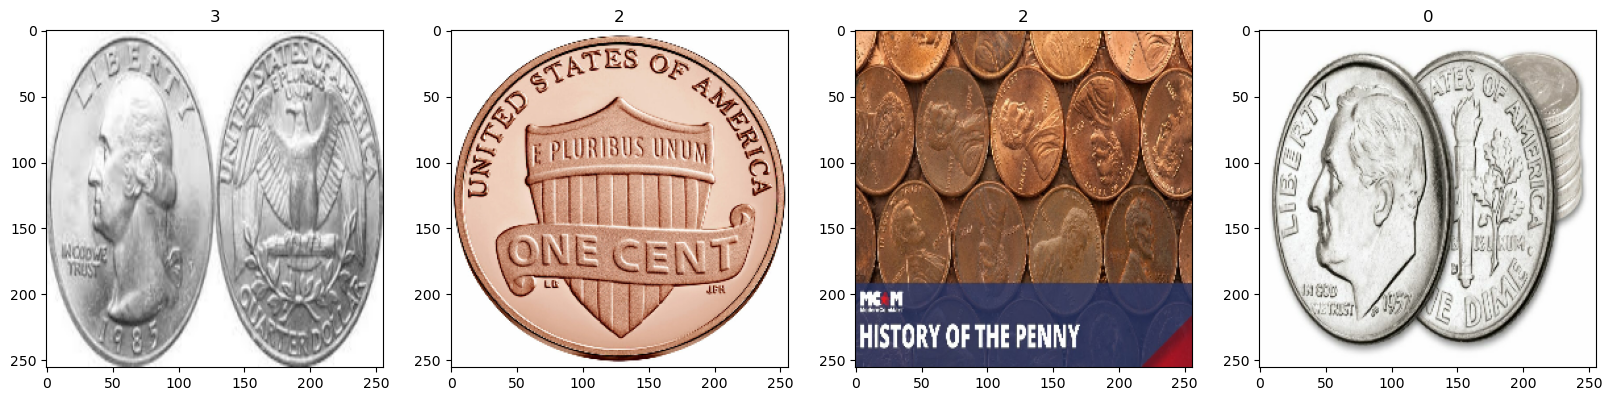

In [202]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [200]:
data = data.map(lambda x,y: (x/255, y))

In [201]:
data.as_numpy_iterator().next()

(array([[[[1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          ...,
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05]],
 
         [[1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          ...,
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05]],
 
         [[1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          [1.53787023e-05, 1.53787023e-05, 1.53787023e-05],
          ...,
          [1.53787023e-05, 1.53787023e-05, 1.5378

# 5. Split Data

In [203]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [204]:
train_size

9

In [205]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [206]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [208]:
model = Sequential()

In [209]:
#adds layer 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [210]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [211]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 30, 30, 16)      

# 7. Train

In [212]:
logdir='logs'

In [213]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [214]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: in user code:

    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\patri\anaconda3\Lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


# 8. Plot Performance

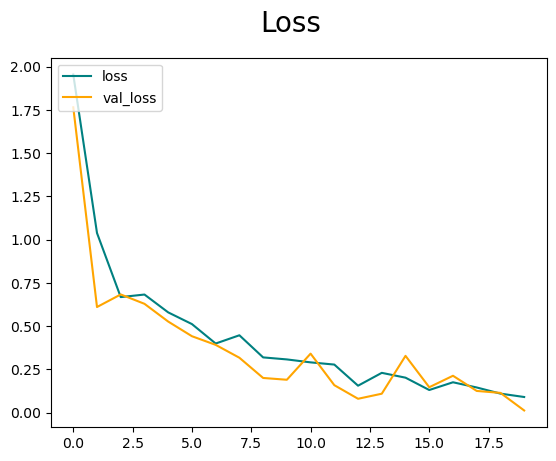

In [81]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

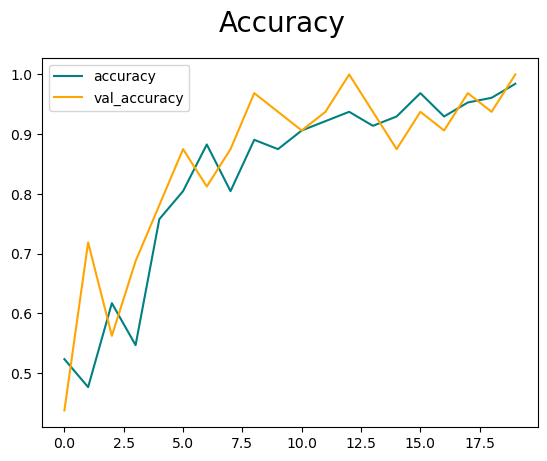

In [82]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

# 10. Test

# 11. Save the Model